In [1]:
###
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

stabilirea caii catre date

In [2]:
#calea catre directorul setului de date
dataset_folder = '/content/drive/MyDrive/Colab Notebooks/ds'
test_folder = '/content/drive/MyDrive/Colab Notebooks/test'

In [4]:
#functia to load images from a folder
def load_train_images_from_folder(folder, target_shape=None):
  images = []
  labels = []
  for subfolder in os.listdir(folder):
    subfolder_path = os.path.join(folder, subfolder)
    if os.path.isdir(subfolder_path):
      for filename in os.listdir(subfolder_path):
        if filename.endswith('.jpeg'):
          img = cv2.imread(os.path.join(subfolder_path, filename))
          if img is not None:
            #resize the image to a consistent shape(e.g., 100x100)
            if target_shape is not None:
              img = cv2.resize(img, target_shape)
            images.append(img)
            labels.append(subfolder)
            print('Labels \n', labels)
          else:
            print(f"Warning: Unable to load {filename}")
  return images, labels

In [6]:
def load_test_images_from_folder(folder, target_shape=None):
  test_images = []
  test_labels = []
  for subfolder in os.listdir(folder):
    subfolder_path = os.path.join(folder, subfolder)
    if os.path.isdir(subfolder_path):
      for filename in os.listdir(subfolder_path):
        if filename.endswith('.jpeg'):
          img = cv2.imread(os.path.join(subfolder_path, filename))
          if img is not None:
            #resize the image to a consistent shape(e.g., 100x100)
            if target_shape is not None:
              img = cv2.resize(img, target_shape)
            test_images.append(img)
            test_labels.append(subfolder)
            print('Labels \n', test_labels)
          else:
            print(f"Warning: Unable to load {filename}")
  return test_images, test_labels

plot images grouped by clusters

In [8]:
# Function to plot images grouped by clusters
def plot_cluster_images(images, cluster_assignments, titles):
  n_clusters = len(images)
  plt.figure(figsize=(15, 5))
  for cluster in range(n_clusters):
    cluster_images = images[cluster]
    cluster_title = f"Cluster {cluster}({len(cluster_images)} images)"
    for i, image in enumerate(cluster_images):
      plt.subplot(n_clusters, len(cluster_images), i + 1 + cluster * len(cluster_images))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      image_idx = np.where(cluster_assignments == cluster)[0][i] # find the indices for
      plt.title(f"{titles[image_idx]}")
      plt.axis('off')
    plt.show()

In [11]:
# Load images and labels from the 'dataset' folder and resize them to (100, 100)
images, labels = load_train_images_from_folder(dataset_folder, target_shape=(200, 200))

# Apply K-Means clustering
n_clusters = 2 # User-defined number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Reshape the images and convert them to grayscale
image_data = [cv2. cvtColor (image, cv2. COLOR_BGR2GRAY). flatten() for image in images]

# Convert the list of 1D arrays to a 2D numpy array
image_data = np. array (image_data)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(image_data)

# Train the K-Means model
kmeans.fit(scaled_data)

# Get the cluster assignments for each image
cluster_assignments = kmeans.labels_

# Group images by clusters
cluster_images = [[] for _ in range(n_clusters)]
for i, label in enumerate(labels):
  cluster = cluster_assignments[i]
  cluster_images[cluster].append(images[i])

# Assign titles for images in each cluster
titles = labels

Labels 
 ['red']
Labels 
 ['red', 'red']
Labels 
 ['red', 'red', 'red']
Labels 
 ['red', 'red', 'red', 'red']
Labels 
 ['red', 'red', 'red', 'red', 'red']
Labels 
 ['red', 'red', 'red', 'red', 'red', 'red']
Labels 
 ['red', 'red', 'red', 'red', 'red', 'red', 'red']
Labels 
 ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue']


Afisare rezultate si organizare pe clustere

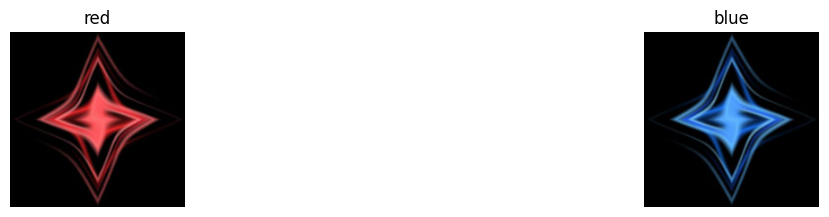

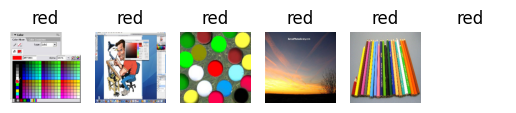

In [12]:
# plot images grouped by clusters
plot_cluster_images(cluster_images, cluster_assignments, titles)